## CS 105 Final Project Group 1
Group Members: Shreya Mohan, Adelyn Lampley, Khushi Chaudhari, Adrian Franco, Nick Wong

## Project Proposal
Our projects aims to see what features contribute to someone buying something. We will try to predict whether a person will purchase something from an online stores by training it on a set of features and seeing whether there was revenue.

Our dataset comes from the UCI Machine Learning Repository, consisting of a set of many unique variables that could play a part in whether someone purchases items online. 

For our project, we plan on analyzing these different variables. We will use different EDA methods to first analyze and understand the data in detail.

Then, we will use forwards and backwards selection, along with K-Nearest Neighbors for supervised learning, as well as K-means clustering for unsupervised learning.

## Data Set
https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

In [1]:
# imported libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic


## Slides
https://docs.google.com/presentation/d/1yGxVALXWr5U7fGRP_hvFEsz7qkGFmaaySzz_VtWoyVE/edit?usp=sharing

## Contributions
| Team Member | Contribution |
|:---------:|:---------:|
| Adelyn Lampley | Implemented greedy feature-selection algorithm, KNN, and supervised learning analysis | 
| Shreya Mohan | Implemented KNN, created slides for presentation, unsupervised learning analysis|  
| Khushi Chaudhari | Implemented the data cleaning. Implemented EDA (including graphs, tests) |
| Nick Wong | Unsupervised learning algorithm with forward selection | 
| Adrian Franco | Unsupervised learning algorithm with backward selection  | 

## Data Cleaning

In [2]:
label_encoder = LabelEncoder()

df = pd.read_csv("online_shoppers_intention.csv")
df = df[["Administrative", "Administrative_Duration", 
         "Informational", "Informational_Duration", 
         "ProductRelated", "ProductRelated_Duration", 
         "PageValues", "SpecialDay", "Browser", "Region", 
         "TrafficType", "VisitorType", "Weekend", "Month", "Revenue"]]

df["Administrative"] = df["Administrative"].astype(int)
df["Information"] = df["Informational"].astype(int)
df["ProductRelated"] = df["ProductRelated"].astype(int)
df["Administrative_Duration"] = df["Administrative_Duration"].astype(float)
df["Informational_Duration"] = df["Informational_Duration"].astype(float)
df["ProductRelated_Duration"] = df["ProductRelated_Duration"].astype(float)
df["PageValues"] = df["PageValues"].astype(float)
df["SpecialDay"] = df["SpecialDay"].astype(float)

df_nums = df

df_nums['Weekend'] = label_encoder.fit_transform(df_nums['Weekend'])
df_nums['Revenue'] = label_encoder.fit_transform(df_nums['Revenue'])

month_abbreviations = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_mapping = {month: index for index, month in enumerate(month_abbreviations)}
df_nums['Month'] = df_nums['Month'].map(month_mapping) # maps all the months 0-11 in order

mapping = {'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}
df_nums['VisitorType'] = df_nums['VisitorType'].map(mapping) 
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Browser,Region,TrafficType,VisitorType,Weekend,Month,Revenue,Information
0,0,0.0,0,0.0,1,0.000000,0.0,0.0,1,1,1,0,0,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.0,0.0,2,1,2,0,0,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.0,0.0,1,9,3,0,0,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.0,0.0,2,2,4,0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.0,0.0,3,1,4,0,1,1,0,0


## Exploratory Data Analysis

### Visualizations

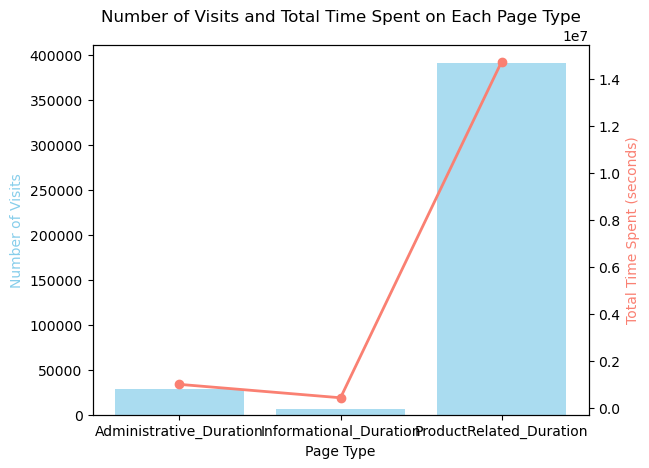

In [3]:
df_pages = df[['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

visits = df_pages[['Administrative', 'Informational', 'ProductRelated']].sum()
time_spent = df_pages[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].sum()

fig, ax1 = plt.subplots()

ax1.bar(visits.index, visits.values, color="skyblue", alpha=0.7)
ax1.set_ylabel('Number of Visits', color="skyblue")

ax2 = ax1.twinx()
ax2.plot(time_spent.index, time_spent.values, color="salmon", marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Total Time Spent (seconds)', color="salmon")
ax1.set_xlabel('Page Type')
ax1.set_title('Number of Visits and Total Time Spent on Each Page Type')

plt.show()

This bar chart and line chart combination visualizes the three types of pages in terms of numbers of visits and the average time spent on each. The x-axis has the three types of pages. The left y-axis counts the number of visits as a bar graph, and the right y-axis counts the time spent in seconds as a line corresponding to each bar. Looking at this visualization, we can conclude that most visitors are likely to look at the product related pages, so they spend the most overall time on those pages. Visitors visit the informational pages the least, but the ones who do spend more time relatively on these pages than the other types of pages. 

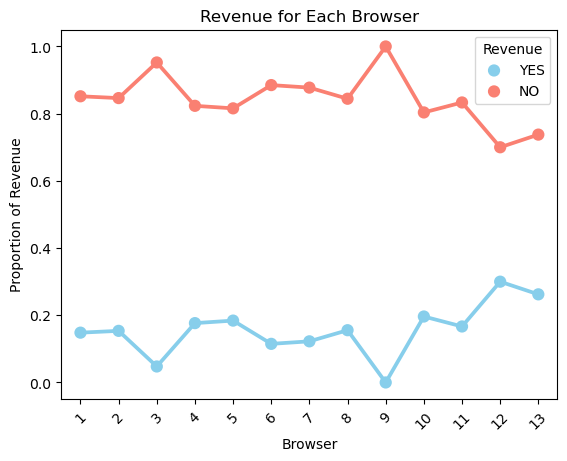

In [4]:
agg_data = df.groupby('Browser')['Revenue'].value_counts(normalize=True).unstack().fillna(0)

sns.pointplot(x=agg_data.index, y=1, data=agg_data, color='skyblue', label='YES')
sns.pointplot(x=agg_data.index, y=0, data=agg_data, color='salmon', label='NO')
plt.title('Revenue for Each Browser')
plt.xlabel('Browser')
plt.ylabel('Proportion of Revenue')
plt.legend(title='Revenue')
plt.xticks(rotation=45)
plt.show()

Based on this pointplot, we can visualize the proportion of yes to no for revenue for each type of browser. Looking at this plot, there are certain browsers that did not have any revenue at all (such as browsers 3 and 9, while some had some revenue (such as browsers 12 and 13). Given this information, we can see that there is a chance that browsers do effect whether a user purchases and produces revenue while shopping online. It is important that we also visualize the distribution of browsers, as some of these may have much more data than others. 

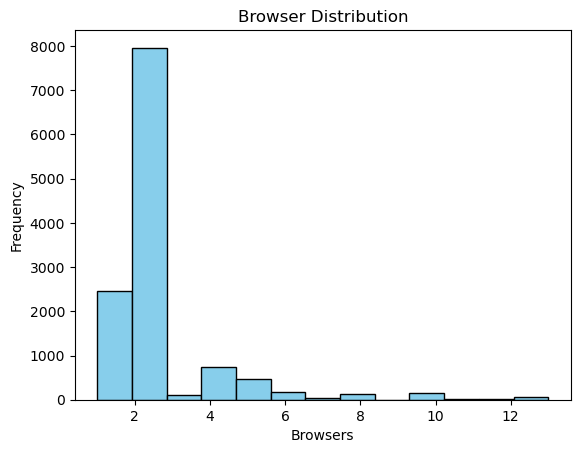

In [5]:
plt.hist(df['Browser'], bins = 13, color = "skyblue", edgecolor = "black")
plt.title('Browser Distribution')
plt.xlabel('Browsers')
plt.ylabel('Frequency')

plt.show()


Looking at this histogram, we can see that the distribution of browsers is very skewed, with most of the observations using browser 2, and the rest being mostly browsers 1, 4, and 5. So, our previous plot showing that 3 and 9 only having yes for revenue might be more because of the lack of observations, but the proportions represented for 1, 2, 4, 5, and even 6 should be reliable. 

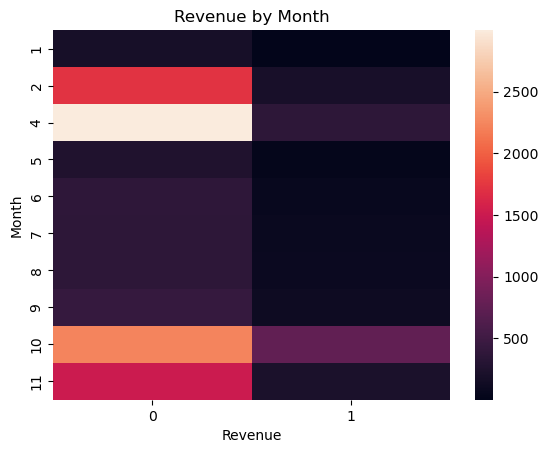

In [6]:
pivot_table = df.pivot_table(index='Month', columns='Revenue', aggfunc='size', fill_value=0)

sns.heatmap(pivot_table)
plt.title('Revenue by Month')
plt.xlabel('Revenue')
plt.ylabel('Month')
plt.show()

On this heatmap, we can see all the months of the year (in which we have data) with lighter colors for higher counts. Based on this visualization, we can see that the beginning and the ends of the year have more revenue relatively compared to the middle of the year. Logically, this makes sense as people do a lot of shopping around holiday season, which is mainly concentrated around those times of year. It is interesting that the beginning of the year also has higher revenue. 

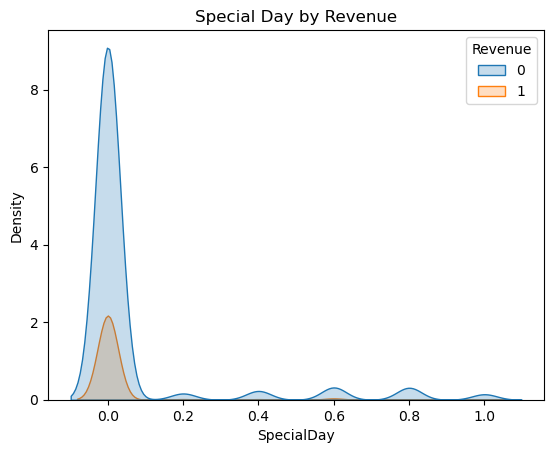

In [7]:
sns.kdeplot(data=df, x='SpecialDay', hue='Revenue', fill=True)
plt.title('Special Day by Revenue')
plt.xlabel('SpecialDay')
plt.ylabel('Density')
plt.show()

Based on this density plot, we can see that in comparison to days close to special days (such as holidays), there is far more revenue when there is not a holiday in the next ~10 days. Also, looking at the patterns for revenue near holidays, it seems that there is the least amount of revenue between 5-10 days before a special day and the most revenue either 10-12 days before the holiday or the 2-3 days before. These observations are based on how high the bumps are for no revenue. 

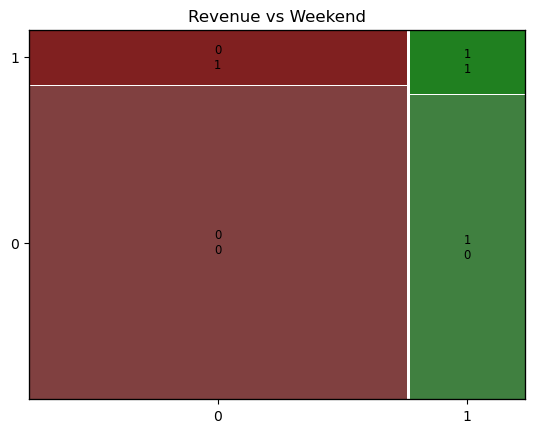

In [8]:
mosaic(df, ['Weekend', 'Revenue'], title='Revenue vs Weekend')
plt.show()

This mosiac plot represents the propotion of revenue and if it's a weekend. The green represents that there was revenue and red for no revenue, and the darker shades for each represent it being a weekend while the lighter shades represent it being a weekday. Based on this mosaic plot, we can conclude there are more purchases done 

## Tests

Pierson Correlation Test: 

Hypothesis: A customer is more likely to spend less time on a product related page the closer it is to a holiday.

In [9]:
correlation_holiday_duration = df['SpecialDay'].corr(df['ProductRelated_Duration'])
print("Pearson Correlation coefficient between Special Day and Product Related Duration:", correlation_holiday_duration)

Pearson Correlation coefficient between Special Day and Product Related Duration: -0.036379845097387294


Based on the value of -0.036, there does not seem to be any correlation between the proximity of it being a holiday and the amount of time spent on a product related page. It does make sense that our value is negative though because the closer we are to a holiday, the less time most people would spend looking for items to purchase. 

Descriptive Statistics: 

Hypothesis: The longer a customer spends interacting with the website, the more likely they are to spend more money getting their products.

In [10]:
descriptive_stats = df.groupby('Revenue')['ProductRelated_Duration'].describe()
print(descriptive_stats)

           count         mean          std  min        25%         50%  \
Revenue                                                                  
0        10422.0  1069.987809  1803.797757  0.0  151.00000   510.19000   
1         1908.0  1876.209615  2312.214392  0.0  541.90625  1109.90625   

                 75%          max  
Revenue                            
0        1331.816667  63973.52223  
1        2266.011310  27009.85943  


We ran some descriptive statistics to observe the distribution of the time spent on a product related page based on whether there was revenue. Based on the mean (1070 < 1876) and the median (510 < 1110), we can see that there is a higher average mean and median when revenue was earned as compared to when there was no revenue at all. The median is likely more reliable than the mean because our distribution for the product related duration will not be normally distributed and will have skew. 

Chi_Squared Test:

Null Hypothesis: The traffic type and revenue earned are independent of each other.

Alternate Hypothesis: The traffic type correlates to revenue earned.

In [11]:
crosstab = pd.crosstab(df['TrafficType'], df['Revenue'])
chi2, p, dof, expected = chi2_contingency(crosstab)
    
chi2_results_career = chi2_contingency(crosstab)

print(f"Chi Squared result for Traffic Type and Revenue:")
print("Chi-squared Statistic:", chi2)
print("P-value:", p)    

Chi Squared result for Traffic Type and Revenue:
Chi-squared Statistic: 373.1455646881486
P-value: 1.652735258160153e-67


Based on the chi squared value of 373 and a significantly small p-value, there is strong evidence against the null hypothsis. We can conclude that there is definitely correlation between the traffic type and whether there is revenue from a user. 

Chi-Squared test:

Null hypothesis: The type of browser and whether there is revenue are independent of each other.

Alternative hypothesis: The type of browser correlates with whether there is revenue. 

In [12]:
crosstab = pd.crosstab(df['Browser'], df['Revenue'])
chi2, p, dof, expected = chi2_contingency(crosstab)
    
chi2_results_career = chi2_contingency(crosstab)

print(f"Chi Squared result for Browser Type and Revenue:")
print("Chi-squared Statistic:", chi2)
print("P-value:", p)    

Chi Squared result for Browser Type and Revenue:
Chi-squared Statistic: 27.71529940138156
P-value: 0.00608754317955109


We have a chi squared value of 27.7 and a p value of 0.006. Based on these results, we can conclude that there is a correlation between the type of browser and whether there is revenue. 

## Prediction Models

### Supervised Learning

Supervised Learning Model - KNN (k = 7)
Selected Features: [6, 13, 11, 9, 8]
Corresponding Max Accuracies: [0.8759 0.8865 0.8897 0.8881 0.8909]
Accuracy: 0.8909
Selected Features: PageValues, Month, VisitorType, Region, Browser
Precision: 0.6583
Recall: 0.5766
F1-score: 0.6148


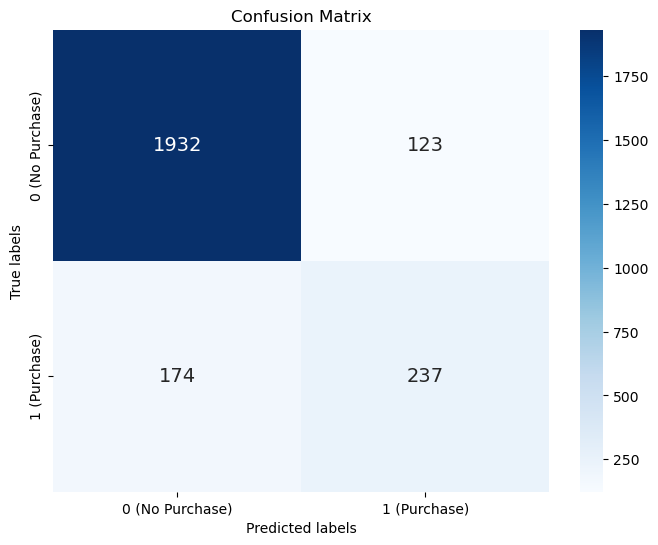

In [13]:
# Initializing size of feature-tuple and # of neighbors 
maxSelectedFeatures = 5
k = 7

# Initialize storage arrays
selected_features = []
maxAccuracies = []

for _ in range(maxSelectedFeatures):
    maxAccuracy = 0
    maxIndex = -1
    
    for i in range(14):  # 14th column is target variable, 0-13 are possible features
        # Skipping features already selected
        if i in selected_features:
            continue

        # add the i-th column to the current tuple 
        X = df_nums.iloc[:, selected_features + [i]]
        
        y = df_nums['Revenue']
        
        # 20% of dataset is in test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train KNN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = knn_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # If curr feature is the best, prepare to add to feature-tuple
        if accuracy > maxAccuracy:
            maxAccuracy = accuracy
            maxIndex = i

    # adding to feature-tuple 
    selected_features.append(maxIndex)
    maxAccuracies.append(maxAccuracy)


# Print the results
print(f"Supervised Learning Model - KNN (k = 7)")
maxAccuracies = np.round(maxAccuracies, decimals=4)
print(f"Selected Features: {selected_features}")
print(f"Corresponding Max Accuracies: {maxAccuracies}")

cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {maxAccuracies[-1]}") #accuracy of 5-tuple
print(f"Selected Features: {df.columns[selected_features[0]]}, \
{df.columns[selected_features[1]]}, {df.columns[selected_features[2]]}, \
{df.columns[selected_features[3]]}, {df.columns[selected_features[4]]}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {round(precision, 4)}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {round(recall, 4)}")
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {round(f1, 4)}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
# Customize axis labels
plt.xticks(ticks=[0.5, 1.5], labels=["0 (No Purchase)", "1 (Purchase)"])
plt.yticks(ticks=[0.5, 1.5], labels=["0 (No Purchase)", "1 (Purchase)"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

For performing supervised learning on our model, we utilized a greedy feature-selection algorithm to determine which five-tuple of features would provide the best accuracy for determining our target variable via K-nearest-neighbors algorithm. We found that the five most influential features in the dataset is PageValues (transacation value from page/# of page visits), Month, VisitorType (new, returning), Region (geographical), and Browser (mobile, web, etc.). It is not surprising that the first variable chosen was PageValues, as it is a direct numerical representation of the revenue generated in comparison of number of times the page was visited. However, we thought that some other variables, such as SpecialDay and Weekend, would be stronger in predicting the revenue. 

After finding our five-tuple, this model provides an accuracy of 89.05% in predicting revenue from our testing set. We produced a confusion matrix, and displayed it as a heatmap to visually see the differences between our true-positive and true-negative results against our false-positive and false-negative results. Upon initial observation, it became evident that the dataset displays a significant bias toward negative outcomes. This observation aligns with the inherent nature of the dataset, where the frequency of visitors engaging in browsing on e-commerce sites would be greater than the instances of making a purchase during each visit.

At first glance, our precision and recall rates seem quite low, especially compared to the accuracy score of our model. This is because of the aforementioned skewed nature of our set, with a high proportion of negative values. Despite the model's overall good performance, the limited occurrence of positive values creates an impression of suboptimal performance in terms of precision and recall. 

## Unsupervised Learning K-means clustering 

## Feature Selection:

In [14]:
df_nums['Revenue'] = label_encoder.fit_transform(df_nums['Revenue'])
print(df['Revenue'].unique())

[0 1]


## Forwards Feature Selection:


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Assume df is your DataFrame, and 'target' is the column you want to predict
X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
selected_features = []
best_score = 0.0
max_SelectedFeatures = 5

while len(selected_features) < max_SelectedFeatures:
    best_feature = None
    for feature in X.columns:
        if feature not in selected_features:
            # Add the feature to selected features
            selected_features.append(feature)
            
            # Train model using selected features
            model = LogisticRegression()
            model.fit(X_train[selected_features], y_train)
            
            # Evaluate model
            y_pred = model.predict(X_test[selected_features])
            score = accuracy_score(y_test, y_pred)
            
            # Update best score and best feature
            if score > best_score:
                best_score = score
                best_feature = feature
            
            # Remove feature if model's performance does not improve
            else:
                selected_features.remove(feature)
    
    # If no feature improves the model, break the loop
    if best_feature is None:
        break

# Finalize
final_model = LogisticRegression()
final_model.fit(X_train[selected_features], y_train)
final_score = accuracy_score(y_test, final_model.predict(X_test[selected_features]))

print("Selected features:", selected_features)
print("Final model accuracy:", final_score)

Selected features: ['Administrative', 'ProductRelated', 'PageValues', 'Browser', 'Weekend']
Final model accuracy: 0.8690186536901865


Total Page Visits/Page Durations


C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


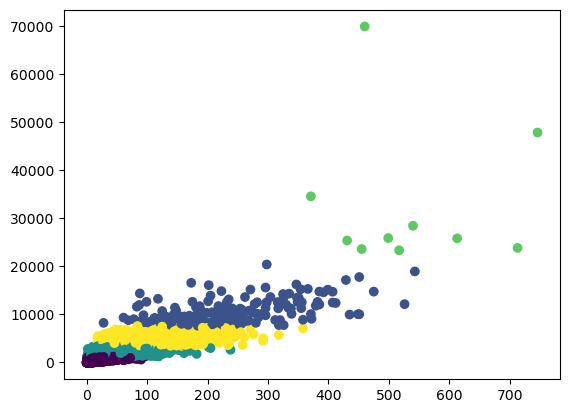

0         1
1         2
2         1
3         2
4        10
         ..
12325    56
12326     5
12327     6
12328    19
12329     3
Length: 12330, dtype: int64


In [16]:
# df = pd.read_csv("online_shoppers_intention.csv")

df_pages = df[['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]

# Sum of visits and time spent
visits = df_pages[['Administrative', 'Informational', 'ProductRelated']].sum(axis=1)
time_spent = df_pages[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].sum(axis=1)

# Create a new DataFrame for clustering
X = pd.DataFrame({'visits': visits, 'time_spent': time_spent})

# Initialize KMeans
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X)

# Predict the clusters
X['cluster'] = kmeans.predict(X)

# Plot the clusters
plt.scatter(X['visits'], X['time_spent'], c=X['cluster'])
plt.show()

print(visits)


C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

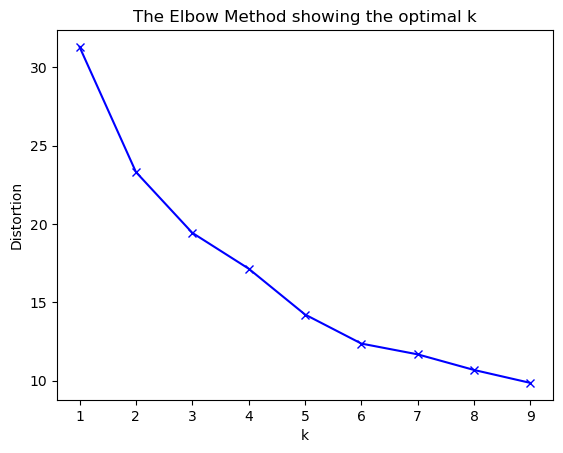

In [17]:
X = df[['Administrative', 'ProductRelated', 'PageValues', 'Browser', 'Weekend']]

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

A K-means clustering of type of Browser and Revenue

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


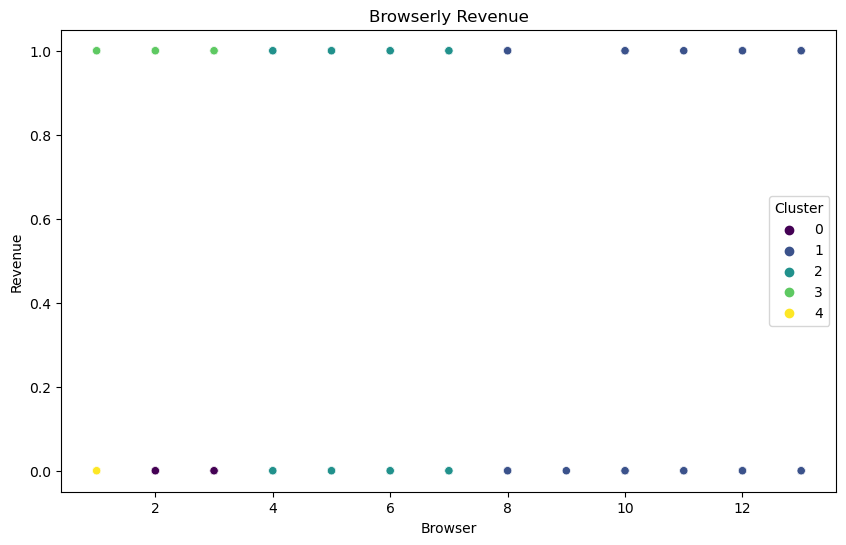

Revenue
0    10422
1     1908
Name: Browser, dtype: int64


In [18]:
df_BrowserlyPurchases = df[['Browser', 'Revenue']]

revenue_counts = df_BrowserlyPurchases.groupby('Revenue')['Browser'].size().fillna(0)
# total_countTrue = revenue_counts.loc['1']
# total_countFalse = revenue_counts.loc['0']

df_BrowserlyPurchases.head()
df_cluster = df_BrowserlyPurchases[['Browser', 'Revenue']]
df_cluster['Browser'] = df_cluster['Browser'].astype(int)  # Convert 'Browser' to integer

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)  # Change the number of clusters as needed
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)


# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Browser', y='Revenue', hue='Cluster', data=df_cluster, palette='viridis')
plt.title('Browserly Revenue')
plt.show()
print(revenue_counts)







A clustering for Weekend and Revenue

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khush\anaconda3\Lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


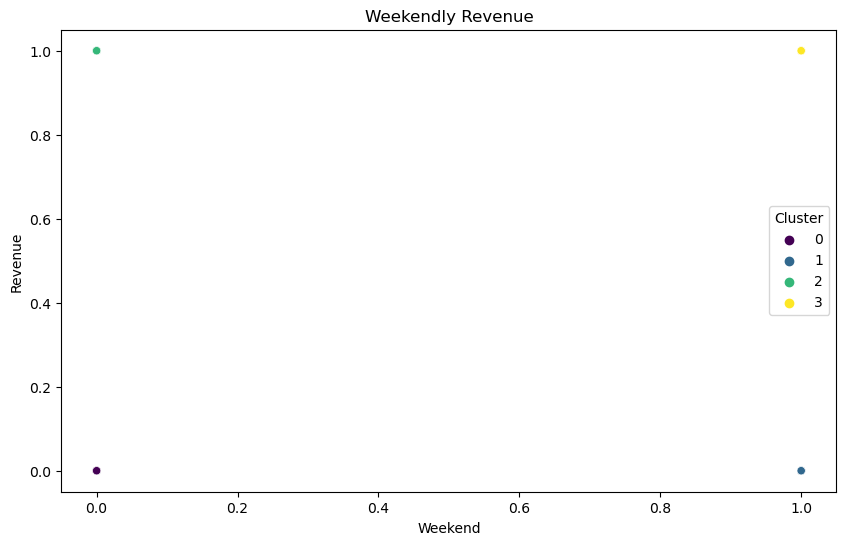

Weekend
0    9462
1    2868
Name: Revenue, dtype: int64


In [19]:
df_WeekendlyPurchases = df[['Weekend', 'Revenue']]

Weekend_counts = df_WeekendlyPurchases.groupby('Weekend')['Revenue'].size().fillna(0)
# total_countTrue = Weekend_counts.loc['1']
# total_countFalse = Weekend_counts.loc['0']

df_WeekendlyPurchases.head()
df_cluster = df_WeekendlyPurchases[['Weekend', 'Revenue']]
df_cluster['Weekend'] = df_cluster['Weekend'].astype(int)  # Convert 'Weekend' to integer

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)  # Change the number of clusters as needed
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)


# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weekend', y='Revenue', hue='Cluster', data=df_cluster, palette='viridis')
plt.title('Weekendly Revenue')
plt.show()
print(Weekend_counts)


Clustering between visits for Product Related Pages and Revenue

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


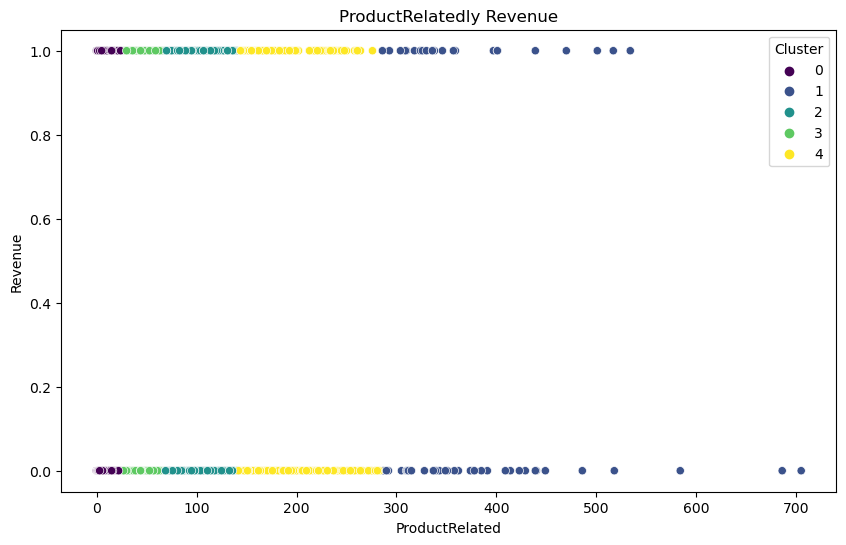

In [20]:
df_ProductRelatedPurchases = df[['ProductRelated', 'Revenue']]

revenue_counts = df_ProductRelatedPurchases.groupby('Revenue')['ProductRelated'].size().fillna(0)
# total_countTrue = revenue_counts.loc['1']
# total_countFalse = revenue_counts.loc['0']

df_ProductRelatedPurchases.head()
df_cluster = df_ProductRelatedPurchases[['ProductRelated', 'Revenue']]
df_cluster['ProductRelated'] = df_cluster['ProductRelated'].astype(int)  # Convert 'ProductRelated' to integer

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)  # Change the number of clusters as needed
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)


# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ProductRelated', y='Revenue', hue='Cluster', data=df_cluster, palette='viridis')
plt.title('ProductRelatedly Revenue')
plt.show()

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khush\AppData\Local\Temp\ipykernel_18668\1035707954.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


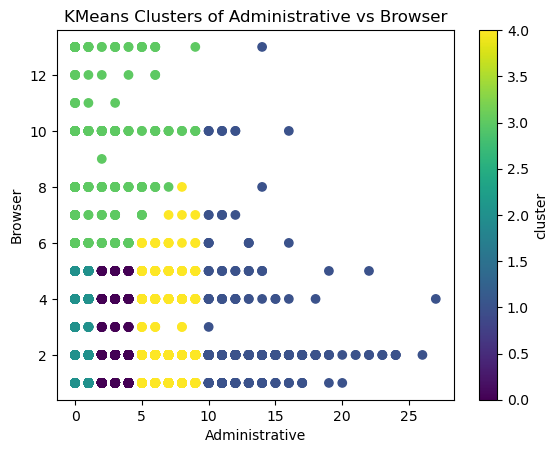

In [21]:
# Create a new DataFrame for clustering
X = df[['Administrative', 'Browser']]

# Initialize KMeans
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X)

# Predict the clusters
X['cluster'] = kmeans.predict(X)

# Plot the clusters
plt.scatter(X['Administrative'], X['Browser'], c=X['cluster'])
plt.xlabel('Administrative')
plt.ylabel('Browser')
plt.title('KMeans Clusters of Administrative vs Browser')
plt.colorbar(label='cluster')
plt.show()

For unsupervised learning, we used the forward selection algorithm to find the features that were most influential to our data set and yielded in the highest accuracy. The number of features that yielded in the best results was 5, and the chosen features were Administrative, ProductRelated, PageValues, Browser, and Weekend. These features were most influential in the impact of whether there was revenue. 

A variety of KMeans clusters were done to classify features such as different browsers, the type of product, type of page. Each one was compared with revenue to see which how each cluster compares to revenue. 

For the page visits vs page duration the cluster 0 represents light shoppers, the cluster 1 represents moderate shoppers, and anything in cluster 3 represents heavy shoppers because they spend a lot of time on website and visit them frequently. 

## Backwards Feature Selection:

In [22]:
from sklearn.preprocessing import StandardScaler

# Assume df is your DataFrame, and 'target' is the column you want to predict
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

max_SelectedFeatures = 9  # Maximum number of features to select
selected_features = list(X.columns)  # Start with all features
best_score = 0.0

while len(selected_features) > max_SelectedFeatures:
    worst_feature = None
    for feature in selected_features:
        # Remove the feature temporarily
        temp_features = [col for col in selected_features if col != feature]
        temp_indices = [selected_features.index(col) for col in temp_features]

        # Train model using selected features
        model = LogisticRegression(solver='liblinear')
        model.fit(X_train_scaled[:, temp_indices], y_train)

        # Evaluate model
        y_pred = model.predict(X_test_scaled[:, temp_indices])
        score = accuracy_score(y_test, y_pred)

        # Update best score and worst feature
        if worst_feature is None or score < best_score:
            best_score = score
            worst_feature = feature

    # Remove the worst feature
    selected_features.remove(worst_feature)

# Finalize
final_model = LogisticRegression(solver='liblinear')
final_model.fit(X_train_scaled[:, [selected_features.index(col) for col in selected_features]], y_train)
final_score = accuracy_score(y_test, final_model.predict(X_test_scaled[:, [selected_features.index(col) for col in selected_features]]))

print("Selected features:", selected_features)
print("Final model accuracy:", final_score)


Selected features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'Weekend', 'Month', 'Information']
Final model accuracy: 0.8682076236820763


C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

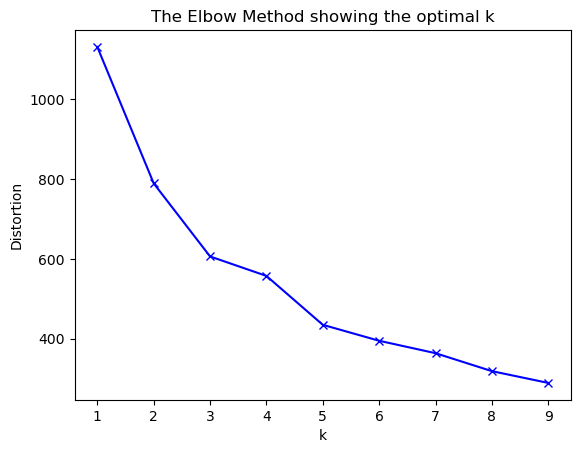

In [23]:
# df = pd.read_csv("online_shoppers_intention.csv")
X = df[ ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'Weekend', 'Month', 'Information']]
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can see here in the graph that variance has the biggest drop off after reaching k =3, therefore 3 would be the optimal amount of clusters. 

Clustering for the month and whether or not they purchased something.

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


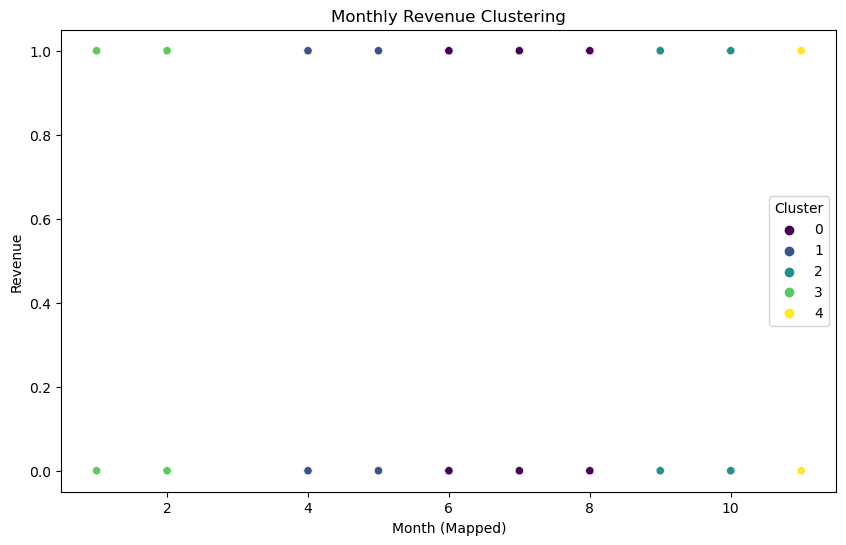

Revenue
0    10422
1     1908
Name: count, dtype: int64


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# Select relevant features
df_monthly_revenue = df[['Month', 'Revenue']]

# Create a DataFrame for clustering
df_cluster = df_monthly_revenue.copy()

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Month', y='Revenue', hue='Cluster', data=df_cluster, palette='viridis')
plt.title('Monthly Revenue Clustering')
plt.xlabel('Month (Mapped)')
plt.ylabel('Revenue')
plt.show()

# Display the counts of revenue categories
print(df_cluster['Revenue'].value_counts())


Here we have a clustering of time spent on informational websites and whether or not the user bought something from these websites

We also used backward selection to find the most optimal features for our unsupervised learning model. In this, initally all fetaures are taken into account, and features are deleted to optimize the accuracy. Using this algorithm we found that the optimal number of features was 9. These features included Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, Weekend, Month, and Information.

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


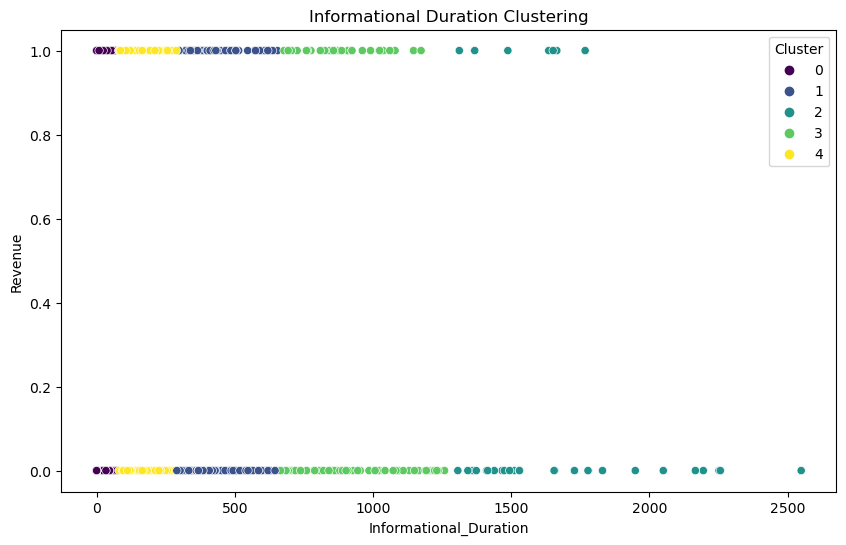

Revenue
0    10422
1     1908
Name: count, dtype: int64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Select relevant features
df_informational_revenue = df[['Informational_Duration', 'Revenue']]

# Create a DataFrame for clustering
df_cluster = df_informational_revenue.copy()

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Informational_Duration', y='Revenue', hue='Cluster', data=df_cluster, palette='viridis')
plt.title('Informational Duration Clustering')
plt.xlabel('Informational_Duration')
plt.ylabel('Revenue')
plt.show()

# Display the counts of revenue categories
print(df_cluster['Revenue'].value_counts())


Now we have clustering for the time spent on administrative websites and whether or not the user bought something.

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


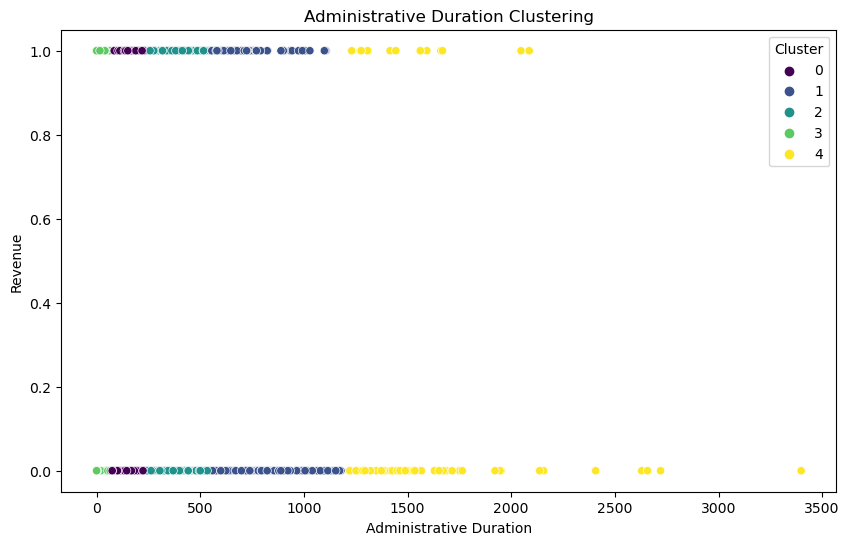

Revenue
0    10422
1     1908
Name: count, dtype: int64


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Select relevant features
df_admin_duration_revenue = df[['Administrative_Duration', 'Revenue']]

# Create a DataFrame for clustering
df_cluster = df_admin_duration_revenue.copy()

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster)

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Administrative_Duration', y='Revenue', hue='Cluster', data=df_cluster, palette='viridis')
plt.title('Administrative Duration Clustering')
plt.xlabel('Administrative Duration')
plt.ylabel('Revenue')
plt.show()

# Display the counts of revenue categories
print(df_cluster['Revenue'].value_counts())


Here we have a plot of how close a day was to a special day and how many visits a website got. It seems that people don't really tend to visit websites close to a special day and they tend to visit websites when the day is farther from a special day.

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


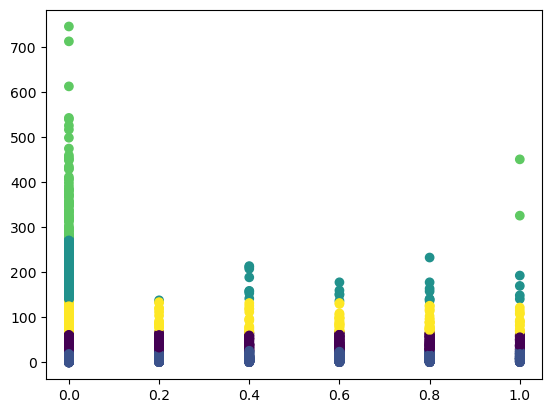

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Select relevant features

df_pages = df[['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']]
visits = df_pages[['Administrative', 'Informational', 'ProductRelated']].sum(axis=1)

X = pd.DataFrame({'Special Day': df['SpecialDay'], 'visits': visits })
# Create a DataFrame for clustering

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

X['cluster'] = kmeans.predict(X)
# Plot the data
plt.scatter(X['Special Day'], X['visits'], c=X['cluster'])
plt.show()


## Conclusion

Overall, through our analysis on the features that affect an online shop receiving revenue we were able to see that the administrative, weekend, month, visitor type, page duration, and browser had the most influential effects. 

Based on our original hypothesis, these results both solidify and add to our predictions on what affects a person's online shopping experience. 

After training our data of various models such and K-Nearest-Neighbors, and K-Means Clustering using greedy feature selection, forward feature selection, and backward feature selection, we were able to create models with accuracies on average above 87%. All of our models performed fairly similarly, however our supervised learning algorithm yielded the highest accuracy with an accuracy of 89%. 

One of the main things we had to consider when doing our analysis is that our data set had a large proportion of tuples where there was no revenue compared to making revenue. This affected our confusion matrix for the supervised learning algorithm. 

Additionally, through both the exploratory data analysis and unsupervised learning we were able to notice the large impact that the browser type had on revenue as some browsers resulting in a larger proportion of revenue than others.